# Titanic: Machine Learning from Disaster Prediction:<br>

**Executed by Sudhanshu Kumar** |sudhanshukumar15678@gmail.com



###  Predict survival on the Titanic and get familiar with ML basics.

### Benchmarking scores:

* RF => 87.21%
* SVM => 83.73%
* LR => 81.14%
* XG BOOST => 78.23%


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from xgboost import XGBClassifier
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore") 

### Importing Dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

(len(train_df), len(test_df))

(891, 418)

## Looking into the training dataset
> Printing first 5 rows of the train dataset.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Below is a brief information about each columns of the dataset:

1. **`PassengerId`:** An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.
2. **`Survived`:** Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

3. **`Pclass`:** Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

4. **`Name`:** Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

5. **`Sex`:** Passenger's sex. It's either Male or Female.

6. **`Age`:** Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

7. **`SibSp`:** Number of siblings or spouses travelling with each passenger.
8. **`Parch`:** Number of parents of children travelling with each passenger.
9. **`Ticket`:** Ticket number.
10. **`Fare`:** How much money the passenger has paid for the travel journey.
11. **`Cabin`:** Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.
12. **`Embarked`:** Port from where the particular passenger was embarked/boarded.

### Check the shape of dataset

In [ ]:
train.shape

train_len = len(train_df)
titanic_df = pd.concat([train_df, test_df], axis=0, ignore_index=True, sort=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Describing training dataset

*describe()* method can show different values like count, mean, standard deviation, etc. of numeric data types.

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# describe(include = ['O'])* will show the descriptive statistics of object data types.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kimball, Mr. Edwin Nelson Jr",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [ ]:
# We use info() method to see more information of our train dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking if any column has some missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Looking into the testing dataset

In [ ]:
test.shape

(418, 11)

#### NOTE:
- Test data has 418 rows and 11 columns.
> Train data rows = 891, Test data rows = 418, Total rows = 891+418 = 1309
- We can see that around `2/3` of total data is set as Train data and around 1/3 of total data is set as Test data.


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Relationship between Features and Survival
#### In this section, we analyze relationship between different features with respect to *Survival*. We see how different feature values show different survival chance. We also plot different kinds of diagrams to **visualize** our data and findings.

In [ ]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


## Finding relations between features and survival
### 1) Pclass vs. Survival

In [ ]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
pclass_survived = train.groupby('Pclass').Survived.value_counts()
pclass_survived

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

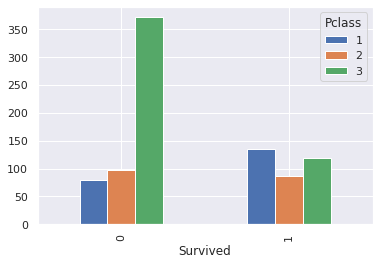

In [ ]:
# plotting the pclass vs survived
pclass_survived.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
pclass_survived_average = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
pclass_survived_average

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


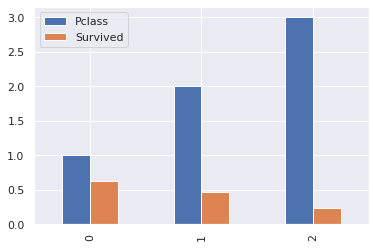

In [ ]:
pclass_survived_average.plot(kind='bar', subplots=False)

NOTE:
- Higher class passengers (low `Pcass`) have better average survival than the low class(high `Pclass`) passengers.

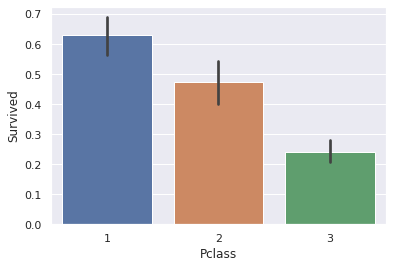

In [ ]:
# The above statement can be clearly understood from the plot below.
sns.barplot(x='Pclass', y='Survived', data=train)

### 2) Sex vs. Survival

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
sex_survival = train.groupby('Sex').Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

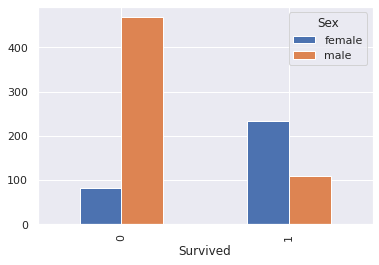

In [ ]:
sex_survival.unstack(level=0).plot(kind='bar', subplots=False)

In [ ]:
sex_survived_average = train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()
sex_survived_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


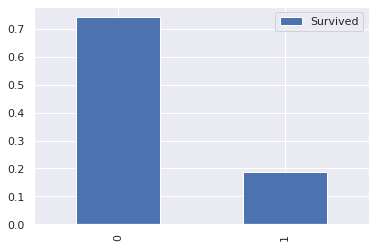

In [ ]:
sex_survived_average.plot(kind='bar', subplots=False)

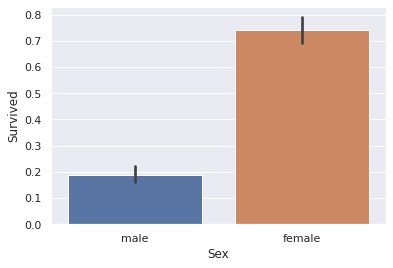

In [ ]:
sns.barplot(x='Sex', y='Survived', data=train)

#### NOTE:
- Females have better survival chance.

### 3) Pclass & Sex vs. Survival

> Below, I have just found out how many males and females are there in each *Pclass* then plotted a bar diagram with that information and found that there are more males among the 3rd Pclass passengers.

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


Text(0, 0.5, 'Percentage')

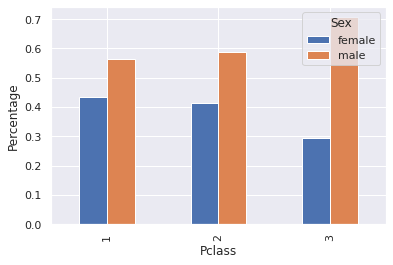

In [ ]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

# sum(1) means the sum across axis 1.
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

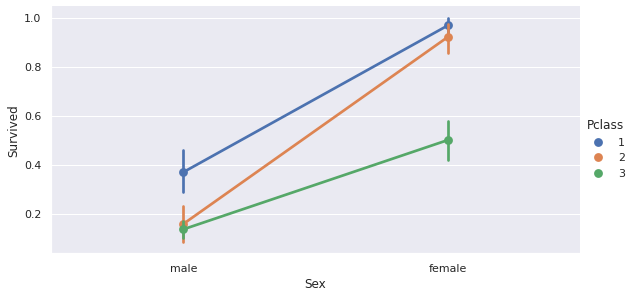

In [ ]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

NOTE:<br>
From the above plot, it can be seen that:
- Women from 1st and 2nd Pclass have almost 100% survival chance. 
- Men from 2nd and 3rd Pclass have only around 10% survival chance.

### 4) Pclass, Sex & Embarked vs. Survival

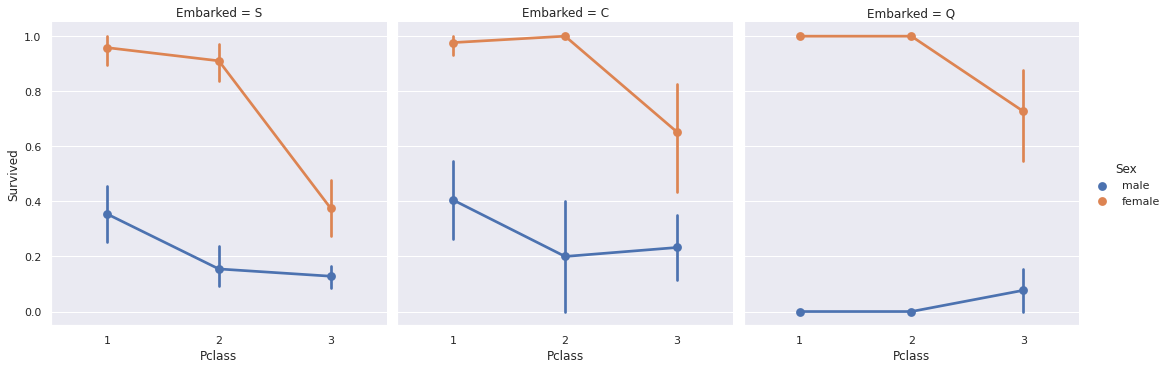

In [ ]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

NOTE:<br>From the above plot, it can be seen that:
- Almost all females from Pclass 1 and 2 survived.
- Females dying were mostly from 3rd Pclass.
- Males from Pclass 1 only have slightly higher survival chance than Pclass 2 and 3.

### 5) Embarked vs. Survived

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


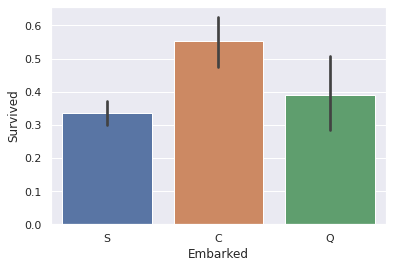

In [ ]:
#train.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=train)

### 6) Parch vs. Survival

In [ ]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [ ]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


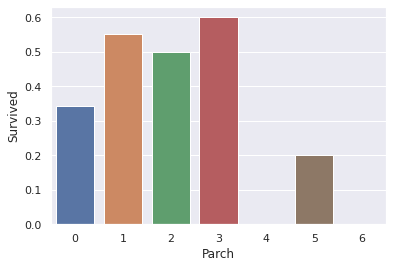

In [ ]:
#train.groupby('Parch').Survived.mean().plot(kind='bar')
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

### 7) SibSp vs. Survival

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [ ]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


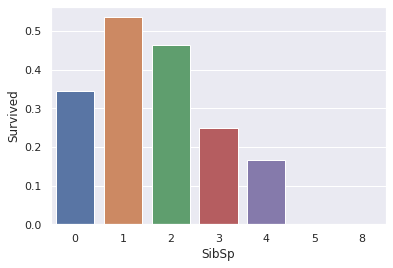

In [ ]:
#train.groupby('SibSp').Survived.mean().plot(kind='bar')
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) 
# ci=None will hide the error bar

### 8) Age vs. Survival

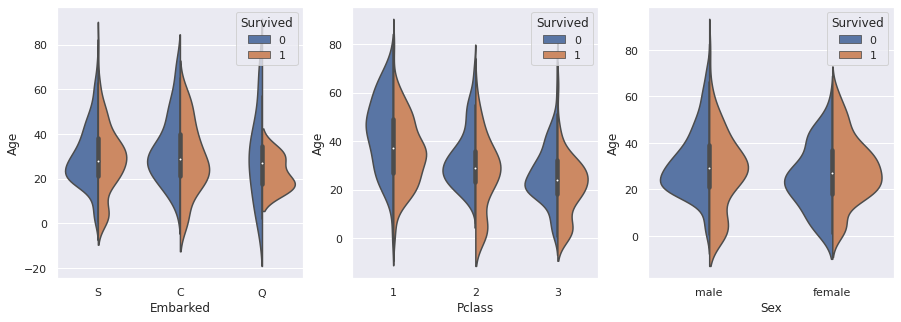

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train, split=True, ax=ax3)

### Plotting some distribution plots based on survival's sex 

In [ ]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]

male_survived = train[(train['Survived']==1) & (train['Sex']=="male")]
female_survived = train[(train['Survived']==1) & (train['Sex']=="female")]

male_not_survived = train[(train['Survived']==0) & (train['Sex']=="male")]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=="female")]

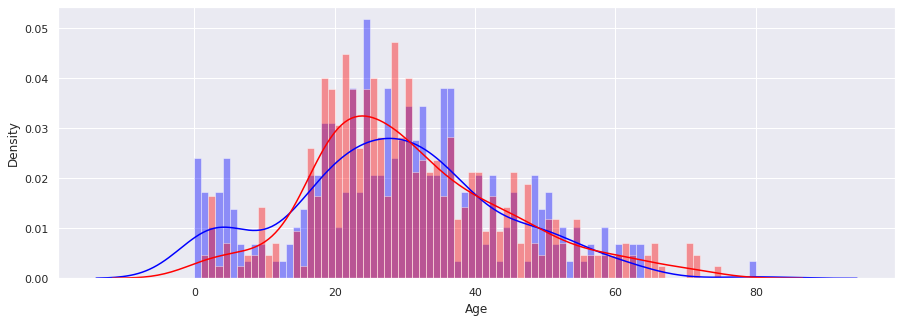

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Age')

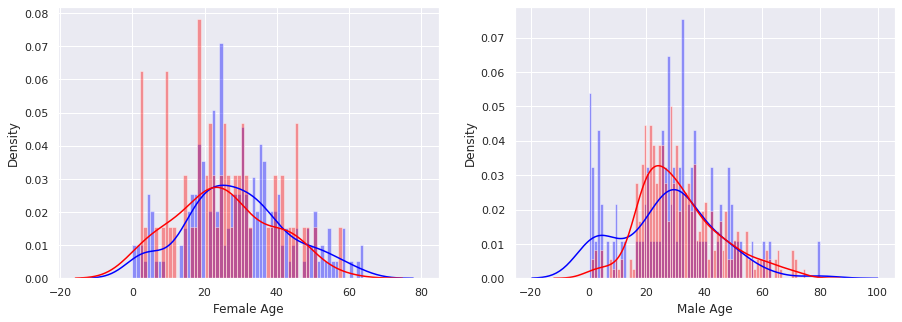

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=True, color='red', axlabel='Male Age')

NOTE:<br>From the above figures, we can see that:
- Combining both male and female, we can see that children with age between 0 to 5 have better chance of survival.
- Females with age between "18 to 40" and "50 and above" have higher chance of survival.
- Males with age between 0 to 14 have better chance of survival.

## Correlating Features

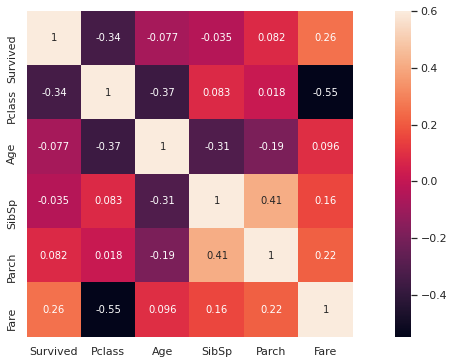

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

### 1) Name Feature
> Let's first extract titles from *Name* column.

In [ ]:
 # combining train and test dataset
train_test_data = [train, test]

# extracting titles from Name column.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


> As you can see above, we have added a new column named *Title* in the Train dataset with the *Title* present in the particular passenger name.

In [ ]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


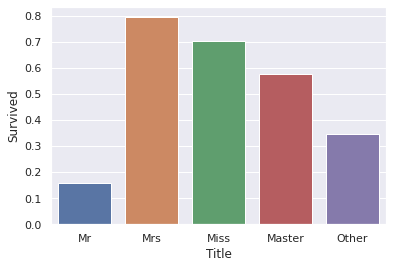

In [ ]:
sns.barplot(x='Title', y='Survived', ci=None, data=train)

Now, we convert the categorical *Title* values into numeric form.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

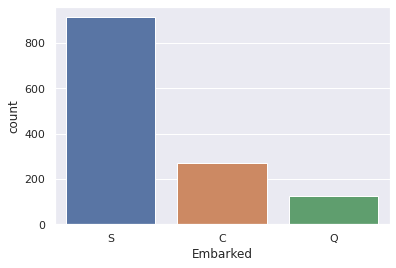

In [ ]:
# Impute "Embarked" missing values with the most common value 'S'

sns.countplot(x='Embarked', data=titanic_df)

In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(value='S')

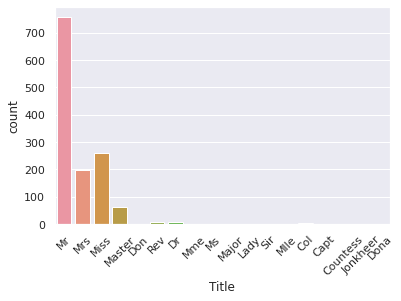

In [ ]:
import re

titanic_df['Title'] = titanic_df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);


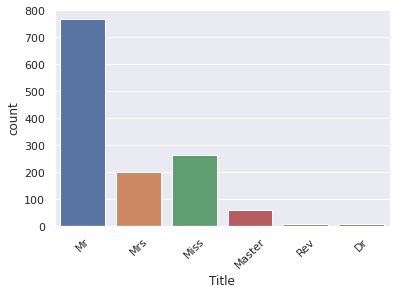

In [ ]:
titanic_df['Title'] = titanic_df['Title'].replace({'Mlle': 'Miss', 
                                                   'Major': 'Mr', 
                                                   'Col': 'Mr', 
                                                   'Sir': 'Mr', 
                                                   'Don': 'Mr', 
                                                   'Mme': 'Miss', 
                                                   'Jonkheer': 'Mr', 
                                                   'Lady': 'Mrs', 
                                                   'Capt': 'Mr', 
                                                   'Countess': 'Mrs', 
                                                   'Ms': 'Miss', 
                                                   'Dona': 'Mrs'})

sns.countplot(x='Title', data=titanic_df);
plt.xticks(rotation=45);

In [ ]:
# Impute "Age" by median of Age of Name's Title group

titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = titanic_df.groupby('Title')['Age'].median()[titles.index(title)]
    titanic_df.loc[(titanic_df['Age'].isnull()) & (titanic_df['Title'] == title), 'Age'] = age_to_impute
    titanic_df['Familial'] = (titanic_df['SibSp'] + titanic_df['Parch']) > 0
    

In [ ]:
medianFare = titanic_df[titanic_df['Pclass'] == 3]['Fare'].median()
titanic_df['Fare'] = titanic_df['Fare'].fillna(value = medianFare)

custom_bucket_array = np.linspace(0, 80, 17)
titanic_df['CatAge'] = pd.cut(titanic_df['Age'], custom_bucket_array)
labels, levels = pd.factorize(titanic_df['CatAge'])
titanic_df['CatAge'] = labels
custom_bucket_array


array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70., 75., 80.])

In [ ]:
custom_bucket_array = np.linspace(0, 520, 53)
titanic_df['CatFare'] = pd.cut(titanic_df['Fare'], custom_bucket_array)
labels, levels = pd.factorize(titanic_df['CatFare'])
titanic_df['CatFare'] = labels
custom_bucket_array

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
       440., 450., 460., 470., 480., 490., 500., 510., 520.])

In [ ]:
titanic_df['SexBool'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['EmbarkedInt'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
titanic_df['TitleInt'] = titanic_df['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rev':4, 'Dr':5})

train_df = titanic_df.loc[titanic_df['PassengerId'] <= train_len]
test_df = titanic_df.loc[titanic_df['PassengerId'] > train_len].iloc[:, titanic_df.columns != 'Survived']

(len(train_df), len(test_df))

(891, 418)

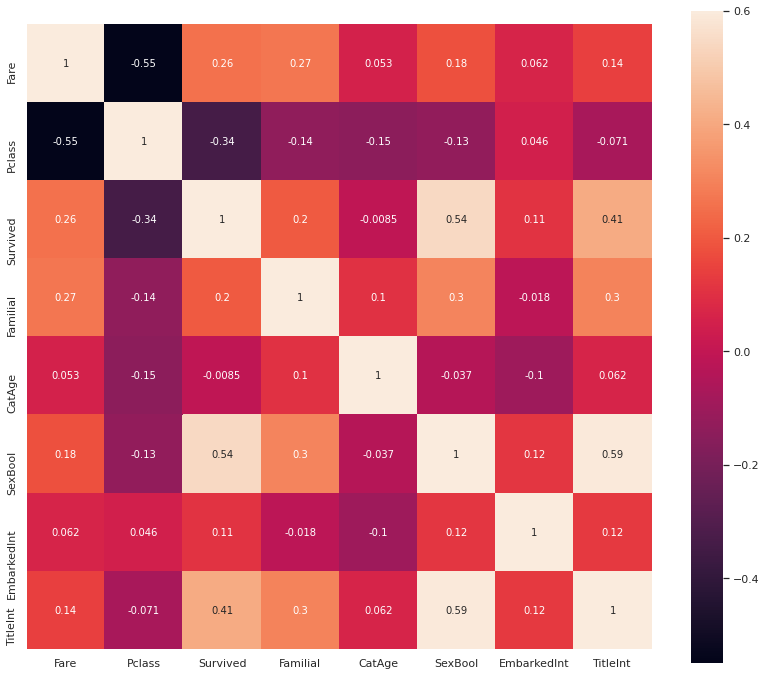

In [ ]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(train_df.drop(['PassengerId', 'Name', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'CatFare', 'Cabin', 'Embarked'],axis=1).corr(), vmax=0.6, square=True, annot=True)

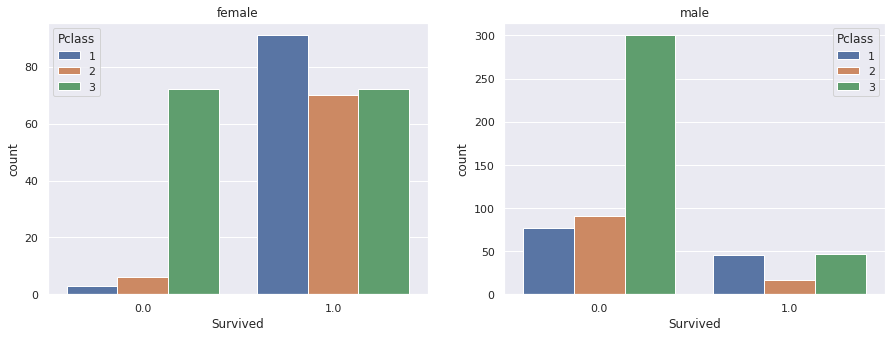

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df.loc[titanic_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Survived', hue='Pclass', data=titanic_df.loc[titanic_df['Sex'] == 'male'], ax=axs[1])

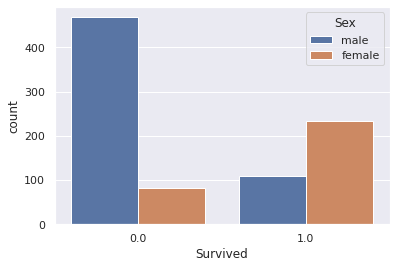

In [ ]:
# The Puzzle
sns.countplot(x='Survived', hue='Sex', data=titanic_df)



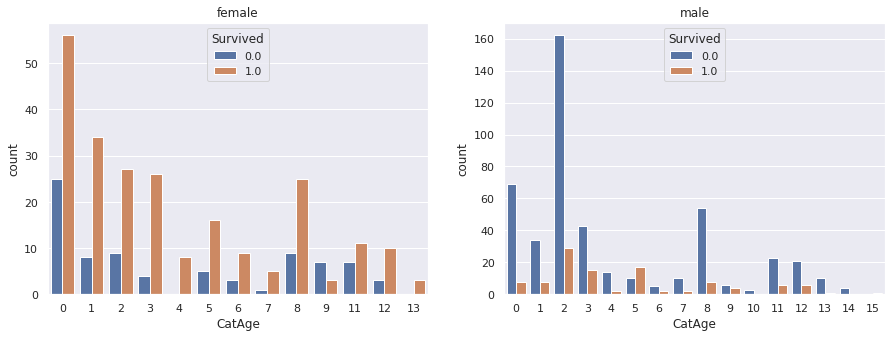

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='CatAge', hue='Survived', data=train_df.loc[train_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='CatAge', hue='Survived', data=train_df.loc[train_df['Sex'] == 'male'], ax=axs[1])

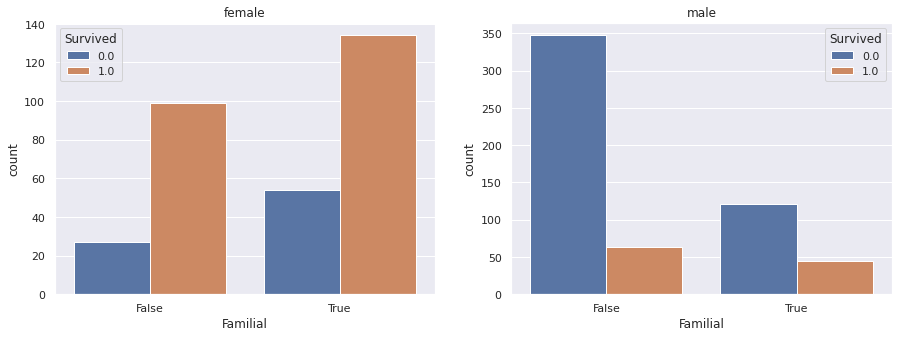

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
axs[0].set_title('female')
sns.countplot(x='Familial', hue='Survived', data=train_df.loc[train_df['Sex'] == 'female'], ax=axs[0])
axs[1].set_title('male')
sns.countplot(x='Familial', hue='Survived', data=train_df.loc[train_df['Sex'] == 'male'], ax=axs[1])

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 2) Sex Feature
> We convert the categorical value of *Sex* into numeric. We represent **0** as **female** and **1** as **male**.

In [ ]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


### 3) Embarked Feature
> There are empty values for some rows for *Embarked* column. The empty values are represented as "nan" in below list.

In [ ]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
for dataset in train_test_data:
    #print(dataset.Embarked.unique())
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


### 4) Age Feature

> We first fill the NULL values of *Age* with a random number between (mean_age - std_age) and (mean_age + std_age). <br>
> We then create a new column named *AgeBand*. This categorizes age into 5 different age range.

In [ ]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.517857
1   (16.0, 32.0]  0.363229
2   (32.0, 48.0]  0.359684
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


> Now, we map *`Age`* according to *`AgeBand`*.

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]"


### 5) Fare Feature
> Replace *missing* *`Fare`* values with the *median* of *`Fare`*.

In [ ]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

> Now, Create *`FareBand`*. We divide the *`Fare`* into *4 category* range.

In [ ]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print (train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


> Map *`Fare`* according to *`FareBand`*

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]"


### 6) SibSp & Parch Feature
> Combining *`SibSp`* & *`Parch`* feature, we create a new feature named *`FamilySize`*.

In [ ]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


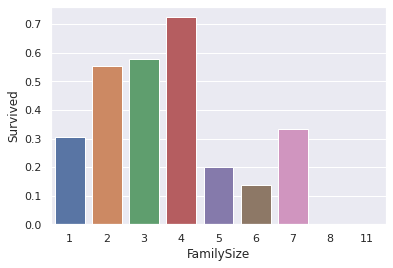

In [ ]:
sns.barplot(x='FamilySize', y='Survived', ci=None, data=train)

In [ ]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


> This shows that travelling alone has only 30% survival chance.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0,1,"(16.0, 32.0]","(-0.001, 7.91]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.0, 32.0]","(7.91, 14.454]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0,3,"(32.0, 48.0]","(31.0, 512.329]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0,1,"(32.0, 48.0]","(7.91, 14.454]",1,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,NaN,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,NaN,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,NaN,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,NaN,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,NaN,0,3,3,0


## Feature Selection
> We drop unnecessary columns/features and keep only the useful ones for our experiment. Column *`PassengerId`* is only dropped from Train set because we need *`PassengerId`* in Test set while creating Submission file to Kaggle.

In [ ]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


> We are done with Feature Selection/Engineering. <br>
> Now, we are ready to train a classifier with our feature set.

## Classification & Accuracy 
Define training and testing set

In [ ]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

#### NOTE:
There are many classifying algorithms present. Among them, we choose the following *Classification* algorithms for our problem:

- Logistic Regression
- Support Vector Machines (SVC)
- Random Forest
- XGBOOST


Here's the training and testing procedure:

> First, we train these classifiers with our training data. <br>
> After that, using the trained classifier, we predict the *`Survival`* outcome of test data.<br>
> Finally, we calculate the accuracy score (in percentange) of the trained classifier.<br>

***Please note:*** that the accuracy score is generated based on our training dataset.

In [ ]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

### 1) Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 80.36%


### 2) Support Vector Machine (SVM)

Support Vector Machine (SVM) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.


In [ ]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 83.61%


### 3) Random Forest

**Random forests** are an **ensemble learning method** for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) 


In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_random_forest) + '%')

Train Accuracy: 87.21%


##4)  XGBoost
<br>
Features Selection for Model Learning

In [ ]:
Columns = ['SexBool', 'Pclass', 'Fare', 'CatAge', 'Familial', 'EmbarkedInt', 'TitleInt']
Label = 'Survived'

train_X = train_df.loc[:, train_df.columns != 'Survived']
train_y = train_df['Survived']

In [ ]:
model = XGBClassifier()

both_scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Loss':'neg_log_loss'}
params = {
        'n_estimators': [100, 200, 500, 1000, 1500],
        'learning_rate': [0.05, 0.1, 0.2]
        #'max_depth':[3, 4, 5]
        }


In [ ]:
clf = GridSearchCV(model, params, cv=5, scoring=both_scoring, refit='AUC', return_train_score=True)
clf.fit(train_X[Columns], train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit='A

In [ ]:
print((clf.best_score_, clf.best_params_))
print("="*30)

print("Grid scores on training data:")
means = clf.cv_results_['mean_test_AUC']
stds = clf.cv_results_['std_test_AUC']
log_losses = clf.cv_results_['std_test_Loss']

for mean, std, log_loss, params in zip(means, stds, log_losses, clf.cv_results_['params']):
    print("AUC Score: %0.3f (+/-%0.03f); Log Loss: %0.3f for %r" % (mean, std * 2, log_loss, params))

(0.8739526918211894, {'learning_rate': 0.1, 'n_estimators': 200})
Grid scores on training data:
AUC Score: 0.870 (+/-0.050); Log Loss: 0.038 for {'learning_rate': 0.05, 'n_estimators': 100}
AUC Score: 0.869 (+/-0.061); Log Loss: 0.049 for {'learning_rate': 0.05, 'n_estimators': 200}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.058 for {'learning_rate': 0.05, 'n_estimators': 500}
AUC Score: 0.872 (+/-0.058); Log Loss: 0.067 for {'learning_rate': 0.05, 'n_estimators': 1000}
AUC Score: 0.871 (+/-0.060); Log Loss: 0.079 for {'learning_rate': 0.05, 'n_estimators': 1500}
AUC Score: 0.870 (+/-0.061); Log Loss: 0.050 for {'learning_rate': 0.1, 'n_estimators': 100}
AUC Score: 0.874 (+/-0.058); Log Loss: 0.055 for {'learning_rate': 0.1, 'n_estimators': 200}
AUC Score: 0.872 (+/-0.061); Log Loss: 0.068 for {'learning_rate': 0.1, 'n_estimators': 500}
AUC Score: 0.869 (+/-0.063); Log Loss: 0.087 for {'learning_rate': 0.1, 'n_estimators': 1000}
AUC Score: 0.865 (+/-0.061); Log Loss: 0.092 for {'learning

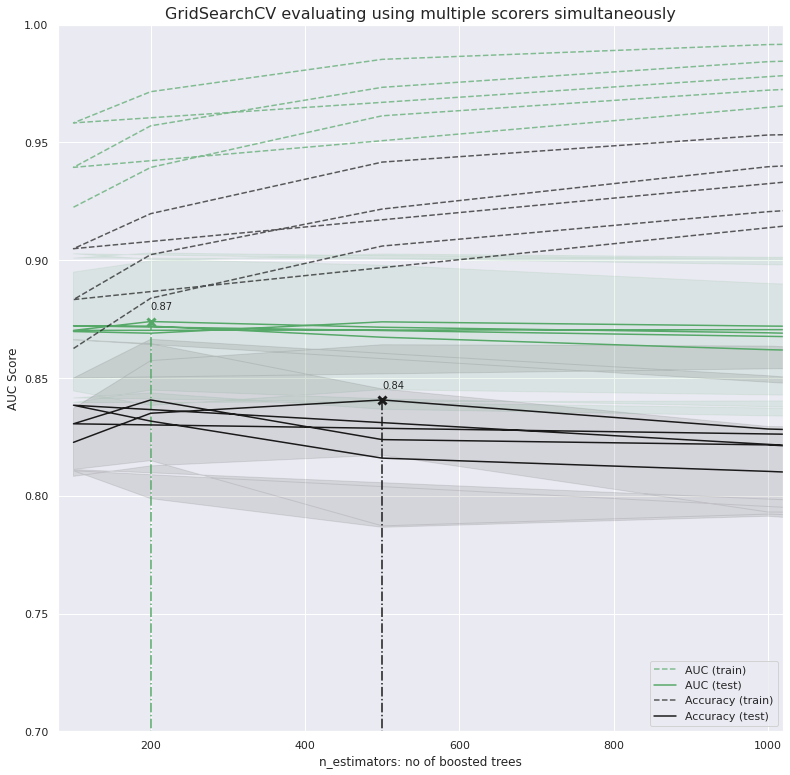

In [ ]:
results = clf.cv_results_

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("n_estimators: no of boosted trees")
plt.ylabel("AUC Score")

ax = plt.gca()
ax.set_xlim(80, 1020)
ax.set_ylim(0.7, 1)

X_axis = np.array(results['param_n_estimators'].data, dtype=float)

for scorer, color in zip(sorted(both_scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_XGB = round(clf.score(X_train, y_train) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB) + '%')

Train Accuracy: 79.24%


In [ ]:

predictions = clf.predict(test_df[Columns]).astype(int)

submission = pd.DataFrame({'PassengerId':test_df['PassengerId'], 'Survived':predictions})

## Comparing Models
> Let's compare the accuracy score of all the classifier models used above.

In [ ]:
models = pd.DataFrame({
  'Model': ['Logistic Regression', 'SVM',
            'Random Forrest','XGBOOST'],
    
    'Score': [acc_log_reg, acc_svc, acc_random_forest,acc_XGB]
    })


models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
2,Random Forrest,87.21
1,SVM,83.61
0,Logistic Regression,80.36
3,XGBOOST,79.24


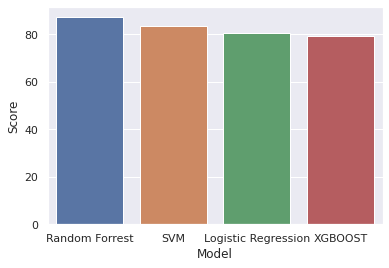

In [ ]:
sns.barplot(x='Model', y='Score', ci=None, data=models)

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
